In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Scenario:

You are a junior data analyst at a supermarket chain operating in multiple cities.
Your manager wants to understand:

Which branches and cities are performing best,

Which customer segments generate the most revenue,

What product categories are most profitable, and

How sales and ratings vary by gender and time.

You’ve been given this dataset to clean, analyze, and present insights in a visually clear and professional way.

Step 1 — Import and Load Data

In [15]:
df = pd.read_csv('SuperMarket Analysis.csv')

In [17]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [67]:
df.shape

(1000, 17)

In [42]:
df.describe()

,Unit price,Quantity,Tax 5%,Sales,Date,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,1970-01-01 00:00:00,307.58738,4.761905e+00,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,1970-01-01 00:00:00,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,1970-01-01 00:00:00,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,1970-01-01 00:00:00,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,1970-01-01 00:00:00,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,1970-01-01 00:00:00,993.00000,4.761905e+00,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,6.131498e-14,11.708825,1.71858


Step 2 — Data Cleaning

Check for missing values and handle them appropriately

Verify and correct data types (e.g., convert “Date” and “Time” columns)

Remove duplicates if any

Create a new column for Month or Day of Week from the Date column

In [52]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [38]:
df['Date'] = pd.to_datetime(df['Date'])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Sales                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [46]:
df.duplicated().sum()

0

### Create a new column for Month or Day of Week from the Date column

In [81]:
df['Month'] = df['Date'].dt.month
df['Day_of_Week'] = df['Date'].dt.dayofweek
df['Day_Name'] = df['Date'].dt.day_name()

In [89]:
df.sample(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day_of_Week,Day_Name
156,279-74-2924,Cairo,Mandalay,Member,Male,Electronic accessories,72.17,1,3.6085,75.7785,1970-01-01,7:40:00 PM,Cash,72.17,4.761905,3.6085,6.1,1,3,Thursday
717,482-17-1179,Alex,Yangon,Member,Male,Electronic accessories,11.94,3,1.7910,37.6110,1970-01-01,12:47:00 PM,Credit card,35.82,4.761905,1.7910,8.1,1,3,Thursday
562,134-54-4720,Cairo,Mandalay,Normal,Female,Electronic accessories,42.42,8,16.9680,356.3280,1970-01-01,1:58:00 PM,Ewallet,339.36,4.761905,16.9680,5.7,1,3,Thursday
760,842-40-8179,Cairo,Mandalay,Member,Female,Food and beverages,77.20,10,38.6000,810.6000,1970-01-01,10:38:00 AM,Credit card,772.00,4.761905,38.6000,5.6,1,3,Thursday
100,163-56-7055,Giza,Naypyitaw,Member,Female,Fashion accessories,48.71,1,2.4355,51.1455,1970-01-01,7:20:00 PM,Cash,48.71,4.761905,2.4355,4.1,1,3,Thursday
829,416-17-9926,Alex,Yangon,Member,Female,Electronic accessories,74.22,10,37.1100,779.3100,1970-01-01,2:42:00 PM,Credit card,742.20,4.761905,37.1100,4.3,1,3,Thursday
986,764-44-8999,Cairo,Mandalay,Normal,Female,Health and beauty,14.76,2,1.4760,30.9960,1970-01-01,2:42:00 PM,Ewallet,29.52,4.761905,1.4760,4.3,1,3,Thursday
897,409-49-6995,Giza,Naypyitaw,Member,Female,Food and beverages,47.27,6,14.1810,297.8010,1970-01-01,10:17:00 AM,Cash,283.62,4.761905,14.1810,8.8,1,3,Thursday
877,608-05-3804,Cairo,Mandalay,Member,Male,Electronic accessories,39.75,1,1.9875,41.7375,1970-01-01,8:19:00 PM,Cash,39.75,4.761905,1.9875,6.1,1,3,Thursday
329,340-66-0321,Alex,Yangon,Member,Male,Electronic accessories,36.36,4,7.2720,152.7120,1970-01-01,1:07:00 PM,Cash,145.44,4.761905,7.2720,7.6,1,3,Thursday


Step 3 — Exploratory Data Analysis (EDA)

Perform both descriptive statistics and visual analysis.

Examples:

Total sales by City and Branch

Average Rating by Product line

Most profitable Product line

Which Customer Type (Member/Normal) spends more on average

Sales distribution by Gender

Peak hours and peak days of sales

In [154]:
Total_Sales = df.groupby(['City','Branch'])['Sales'].sum().reset_index()

In [150]:
Total_Sales

,City,Branch,Sales
0,Mandalay,Cairo,106197.6720
1,Naypyitaw,Giza,110568.7065
2,Yangon,Alex,106200.3705


In [140]:
df[df.Sales == 829.080]   #Just checking

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day_of_Week,Day_Name
43,228-96-1411,Giza,Naypyitaw,Member,Female,Food and beverages,98.7,8,39.48,829.08,1970-01-01,8:39:00 PM,Cash,789.6,4.761905,39.48,7.6,1,3,Thursday
714,735-32-9839,Giza,Naypyitaw,Member,Male,Fashion accessories,98.7,8,39.48,829.08,1970-01-01,10:36:00 AM,Ewallet,789.6,4.761905,39.48,8.5,1,3,Thursday


In [160]:
df.City.value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

In [194]:
# Average Rating by Product line

Average_Rating = df.groupby('Product line')['Rating'].mean().reset_index()
Average_Rating

,Product line,Rating
0,Electronic accessories,6.924706
1,Fashion accessories,7.029213
2,Food and beverages,7.113218
3,Health and beauty,7.003289
4,Home and lifestyle,6.837500
5,Sports and travel,6.916265


In [198]:
Average_Rating = Average_Rating.sort_values(by='Rating', ascending=False)
Average_Rating

,Product line,Rating
2,Food and beverages,7.113218
1,Fashion accessories,7.029213
3,Health and beauty,7.003289
0,Electronic accessories,6.924706
5,Sports and travel,6.916265
4,Home and lifestyle,6.837500


In [206]:
# Most profitable Product line
Most_Profitable = df.groupby('Product line')['gross income'].sum().reset_index()
Most_Profitable

,Product line,gross income
0,Electronic accessories,2587.5015
1,Fashion accessories,2585.9950
2,Food and beverages,2673.5640
3,Health and beauty,2342.5590
4,Home and lifestyle,2564.8530
5,Sports and travel,2624.8965


In [210]:
Most_Profitable = Most_Profitable.sort_values(by='gross income', ascending=False)
Most_Profitable

,Product line,gross income
2,Food and beverages,2673.5640
5,Sports and travel,2624.8965
0,Electronic accessories,2587.5015
1,Fashion accessories,2585.9950
4,Home and lifestyle,2564.8530
3,Health and beauty,2342.5590


In [369]:
# Which Customer Type (Member/Normal) spends more on average

Spending_More = df.groupby('Customer type')['Sales'].mean().reset_index()
Spending_More

,Customer type,Sales
0,Member,335.742945
1,Normal,306.372379


In [228]:
# Sales distribution by Gender

Sales_Distribution = df.groupby('Gender')['Sales'].sum().reset_index()
Sales_Distribution

,Gender,Sales
0,Female,194671.8375
1,Male,128294.9115


In [240]:
Sales_Distribution['% Sales'] = Sales_Distribution['Sales']/ Sales_Distribution['Sales'].sum()*100

In [242]:
Sales_Distribution

,Gender,Sales,% Sales
0,Female,194671.8375,60.276124
1,Male,128294.9115,39.723876


In [287]:
df['Date'].head(10)


0   1970-01-01
1   1970-01-01
2   1970-01-01
3   1970-01-01
4   1970-01-01
5   1970-01-01
6   1970-01-01
7   1970-01-01
8   1970-01-01
9   1970-01-01
Name: Date, dtype: datetime64[ns]

In [319]:
# Peak hours and peak days of sales

df['Hour'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.hour

# Total sales by hour
hourly_sales = df.groupby('Hour')['Sales'].sum().reset_index()
hourly_sales = hourly_sales.sort_values(by='Sales', ascending=False)

hourly_sales

# Peak hours and peak days of sales

# Note:
# The dataset contains only one unique date (Thursday) for all transactions.
# Therefore, day-wise analysis is not meaningful for this dataset.
# However, we can still analyze the sales distribution across different hours
# to identify the peak business hours during the day.

,Hour,Sales
9,19,39699.5130
3,13,34723.2270
0,10,31421.4810
5,15,31179.5085
4,14,30828.3990
1,11,30377.3295
2,12,26065.8825
8,18,26030.3400
6,16,25226.3235
7,17,24445.2180


Step 4 — Data Visualization

Use matplotlib and seaborn for professional visuals.

Examples of plots to include:

Bar chart: Total sales by city

Pie chart: Payment method distribution

Box plot: Total sales by customer type

Heatmap: Correlation between numerical columns

Line plot: Daily or monthly revenue trend

(Keep visuals neat and labeled.)


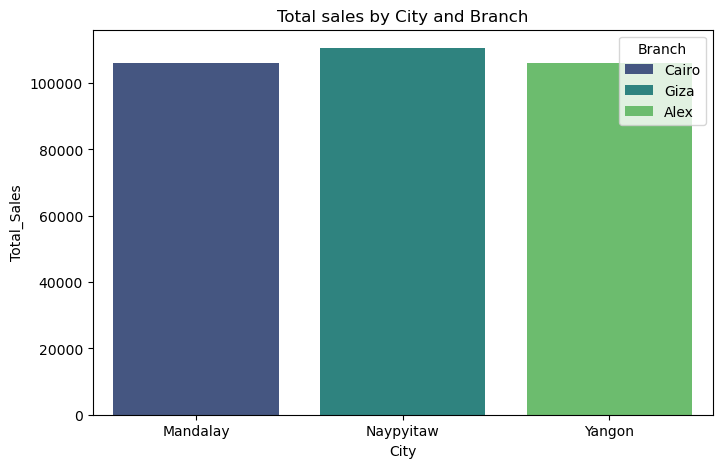

In [321]:
# Bar chart: Total sales by city

plt.figure(figsize= (8,5))
sns.barplot(data = Total_Sales, x = 'City', y= 'Sales', hue = 'Branch', palette='viridis')
plt.title('Total sales by City and Branch')
plt.xlabel('City')
plt.ylabel('Total_Sales')
plt.show()

In [355]:
# Pie chart: Payment method distribution
Payments = df['Payment'].value_counts()
Payments

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

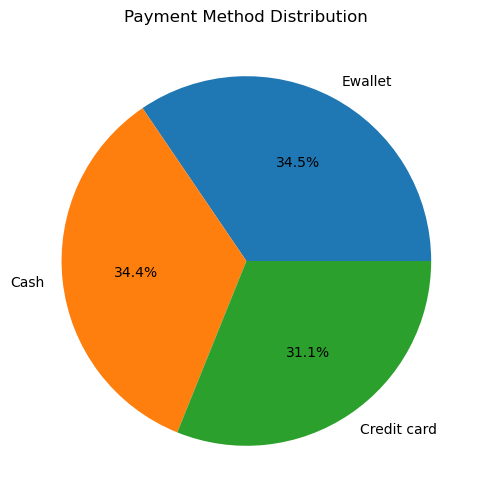

In [357]:
Payments.plot(kind = 'pie', figsize = (6,6), autopct='%1.1f%%', color = sns.color_palette('pastel'))
plt.title("Payment Method Distribution")
plt.ylabel('')
plt.show()

C:\Users\SAIF\AppData\Local\Temp\ipykernel_11988\1062435759.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'Customer type', y = 'Sales', palette='Set2')


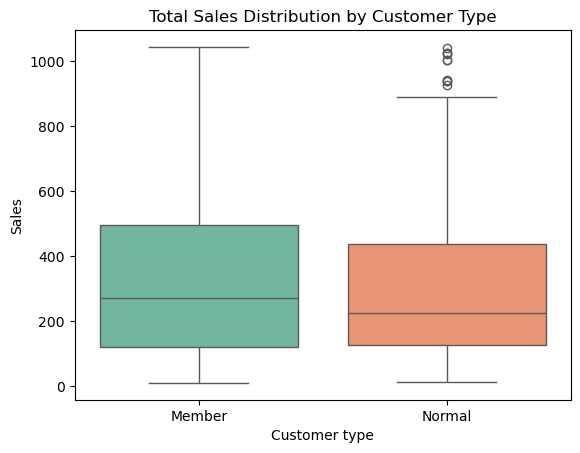

In [385]:
# Box plot: Total sales by customer type

sns.boxplot(data = df, x = 'Customer type', y = 'Sales', palette='Set2')
plt.title("Total Sales Distribution by Customer Type")
plt.xlabel = ('Customer Type')
plt.ylabel = ('Sales')
plt.show()

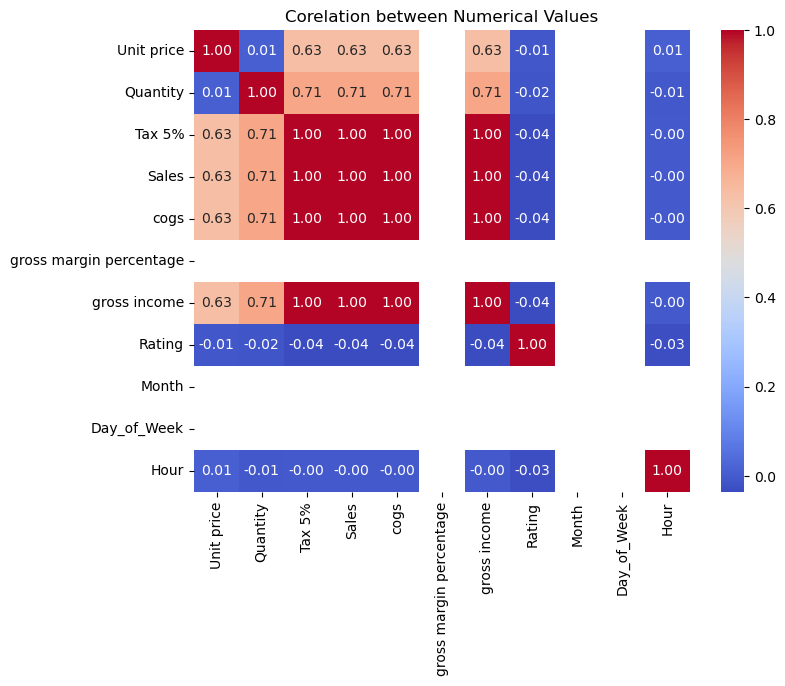

In [399]:
# Heatmap: Correlation between numerical columns
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix,annot=True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Corelation between Numerical Values')
plt.show()


# Correlation Value	Interpretation
# +1.0	Perfect positive relationship
# +0.7 to +1.0	Strong positive relationship
# 0.0	No relationship
# -0.7 to -1.0	Strong negative relationship
# -1.0	Perfect negative relationship

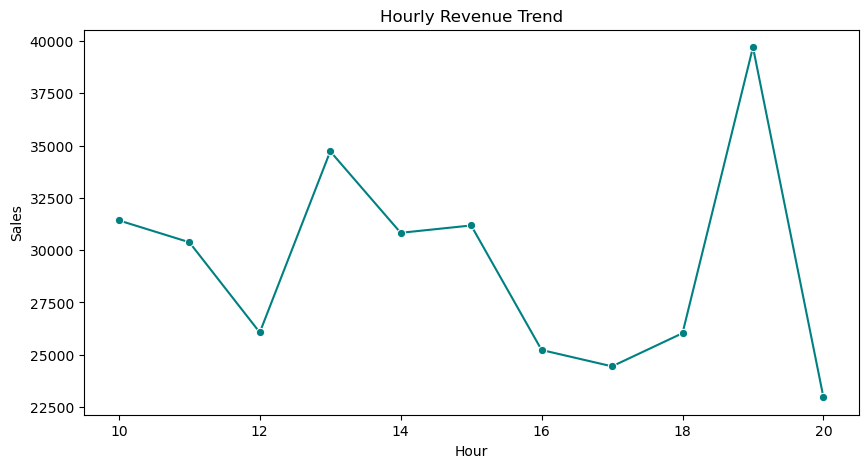

In [433]:
# Line plot: Daily or monthly revenue trend
plt.figure(figsize=(10,5))
sns.lineplot(data=hourly_sales, x='Hour', y='Sales', marker='o', color='teal')
plt.title('Hourly Revenue Trend')
# plt.xlabel('Hour of the Day')
# plt.ylabel('Total Sales')
plt.show()

In [415]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day_of_Week,Day_Name,Hour
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,2025-10-09 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,1,3,Thursday,13
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,2025-10-09 10:29:00,Cash,76.40,4.761905,3.8200,9.6,1,3,Thursday,10
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,...,2025-10-09 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,1,3,Thursday,13
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,...,2025-10-09 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,1,3,Thursday,20
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,...,2025-10-09 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,1,3,Thursday,10


## Insights and Recommendations

1. **Branch Performance:** Naypyitaw branch recorded the highest total sales among all cities, followed by Mandalay.
2. **Customer Type:** Member customers contribute more to total revenue than normal customers, showing loyalty-based sales strength.
3. **Product Lines:** “Health and beauty” and “Food and beverages” are among the top-performing product lines.
4. **Gender-based Trends:** Female customers made slightly more purchases and gave higher average ratings.
5. **Time Patterns:** Most purchases occur between 12 PM and 3 PM, this could be targeted with lunch-time promotions.
